> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset contains medical patient's data along with information on whether the patient attended or missed the appointment.
The dataset contains the following columns in a single table: <br>
<b>PatientID</b>: ID of patient - insignificant <br>
<b>AppointmentID</b>: ID of appointment - insignificant <br>
<b>Gender</b>: Gender of patient - signifcant and interesting but will not be analysed here <br>
<b>ScheduledDay</b>: Day the appointment was scheduled - on its own not interesting but in combination with AppointmendDay it becomes highly significant <br>
<b>AppointmentDay</b>: Day of the actual appointment - on its own not interesting but in combination with ScheduledDay it becomes highly significant <br>
<b>Age</b>: Age of the patient - Significant and interesting to look at correlation between age and missing an appointment <br>
<b>Neighbourhood</b>: Region where the appointment takes place - would only be signicant/interesting if one would know the region very well <br>
<b>Scholarship, Hypertension, Diabetes, Alocolism, Handcap, SMS_received</b>: Binary variables which indicate whether the patient fulfills the respective condition such as having Diabetes or receiving a SMS reminder for the appointment - Significant since there may potentially be a correlation between missing an appointment and having one or more of those conditions<br>
<b>No-Show</b>: Binary variable (target) which indicates whether a patient showed up to an appointment of missed it - obviously significant since it is the target variable <br>

### Question(s) for Analysis
<h6> Research Question 1</h6>
Does fulfilling a certain condition (scholarship, alcoholism, diabetes, hypertension, having a handycap or receiving a SMS reminder) increase/decrease the chance of missing an appointment?

<h6> Research Question 2</h6>
Does the timeframe between scheduling an appointment and the actual appointment affect the number of appointments missed?

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

Start by getting an overview over the dataframe.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Check if and how many NaN values are present in the dataframe?

In [4]:
# Are there any null or NaN values?
df[df.isna()==True].count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

It seems like there are no NaNs in our dataframe. The next step should be to check the data types on of the columns to see whether there is anything which needs to be corrected.

In [5]:
# Check data types and get overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It seems like all columns have the correct data type corresponding to their representation in the table.<br>
Next, check whether there are any duplicated data.

In [6]:
# Do we have any duplicate data?
df[df.duplicated()].shape[0]

0

There are no duplicated data.<br>
However, even though all data are of correct type and there are no Null/NaN values, we might still have
columns where the data do not make sense/are unlogical.<br>
Hence, we need to check whether there are any columns, which should have a fixed, with values 
outside of that range.

In [7]:
# Does any of the binary ('Yes', 'No') columns have errneous values (not in [0, 1])?
cols_bin = df.columns[7:13]
df[cols_bin].isin([0,1]).all()

Scholarship      True
Hipertension     True
Diabetes         True
Alcoholism       True
Handcap         False
SMS_received     True
dtype: bool

From these results, it becomes obvious that the "Handcap" column contains data outside of the binary range,
which need to be investigated and cleaned.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

The "PatientID" and "AppointmentID" columns do not contain any valuable information. Hence, we simply remove them from the dataframe.

In [8]:
# Remove irrelevant information from dataframe
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

The "AppoinemtntDay" column only contains information about the date but not about the time while the "ScheduledDay" column also contains information about the time. However, if we are interested in the time difference between these two events, the information obtained is limited by the "AppointmentDay" column, i.e. we can only extract information to the resolution of days. Hence, it is a reasonable choice to cut off the unusable time information, which is done below.
<br><br>
Additionally, we need to convert the current string object format of these columns to a datetime format:

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Since AppointmentDay does not contain time information, our significant figures are limited by the days
# => Cut off unnecessary time information
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.normalize()
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.normalize()

Next, we need to check whether there are any unreasonable appointments, where the appointment is supposed to take place before the scheduling. First, we create a mask for these types of appointments and check if and how many of them exist:

In [10]:
# Are there any unlogical appointments where Scheduled day is earlier than appointment day?
lunlogical = df['AppointmentDay']-df['ScheduledDay'] < pd.Timedelta(0)
df[lunlogical]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,M,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,F,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,F,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,F,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,M,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes


Apparently, there are only 5 rows, which contain such unlogical appointments.

We should check how this number compares to our total amount of data:

In [11]:
# All unlogical appointments have No-Show=Yes.
# => Check fraction of these with respect to total number of No-Show=Yes appointments.
print("Percentage of unlogical records", 
      ( df[lunlogical].shape[0] / df[df['No-show']=='Yes'].shape[0]*100 ) )

Percentage of unlogical records 0.022402437385187508


As seen above, the fraction of unlogical appointment only amounts to about 0.02 %, which is an insignificant amount of data.

Hence, it should be a reasonable choice to simply delete these data from our table.

In [12]:
# Fraction of unlogical appointments is very small. Should be no problem to just remove these records.
df.drop(df[lunlogical].index, inplace=True)

Next, we compute the time difference between scheduling and the actual appointment. We will save this information in a new coluumn for later analysis.

In [13]:
# Save information on time difference between scheduling and actual appointment
df['TimeDiff'] = df['AppointmentDay'] - df['ScheduledDay']

Since the double negations in our dependent variable "No-Show" are somewhat cumbersome to work with and not that easily interpretable, we simply invert the logic to make interpretations easier.
<br><br>
Furthermore, we convert the "Yes" and "No" into binary integers {0, 1}, which will be required for the EDA.

In [14]:
# Replace No-Show strings by binary integers and invert logic of column (more intuitive)
df.rename(columns={'No-show' : 'Attended'}, inplace=True)
df['Attended'] = df['Attended'].apply(lambda x: 0 if x=='Yes' else 1)

Earlier we saw that the binary "Handcap" column contains values, which are erroneous. We first need to check how many of those erroneous values exist:

In [15]:
# How many erroneous records are related to the Handicap column
df[~df['Handcap'].isin([0,1])].shape[0]

199

The amount of erroneous values seems significantly larger than the previously dropped unlogical values for the appointment time. Hence, before simply dropping those rows entirely, we should check whether there is a way to keep that information.<br>
For this, we are going to compare the histograms of all values in these rows between the entire dataset and the rows, which only contain the erroneous data. If these histograms look similar, we could just replace the the erroneous values with some measure of central tendency.

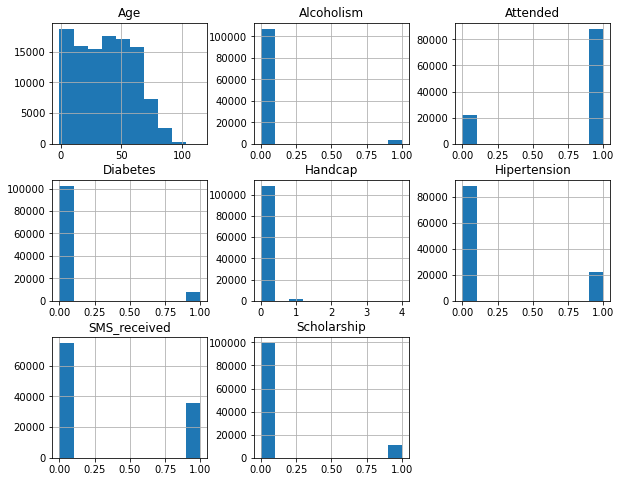

In [16]:
# Plot distribution of all variables to compare to erroneous HandCap variables
df.hist(figsize=(10,8));

Above, we shown the histograms over the entire dataset. To complete this analysis, we need to compute the histograms also for the rows containing the erroneous values.

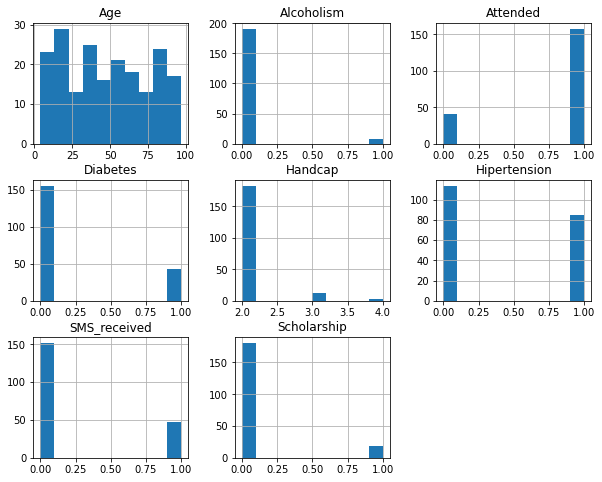

In [17]:
# How do distributions of erroneous values compare?
df[~df['Handcap'].isin([0,1])].hist(figsize=(10,8));

Comparing the two versions of the histograms, it becomes apparent, that the distributions of all variables seem to be very similar for the erroneous rows and the general dataset. Hence, it seems like a reasonable choice to not drop the erroneous rows but to instead impute them with the mode over the entire dataset. The mode is the most reasonable choice here, since the "Handcap" column consists of binary integer values while the mean would yield a real (floating point number). The median on the other hand would in this case yield the same value as the mode.

In [18]:
# Distributions similar: Replace erroneous HandCap values by mode
df.loc[~df['Handcap'].isin([0,1]), 'Handcap'] = df['Handcap'].mode().iloc[0]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: Effect of conditional variables on missing an appointment

Define functions to ease making multiple graphs for different categories since all those
subplots are essentially identical with only the data changing.

In [19]:
# Function to plot total number of people in a given binary category
def plot_hist_binary_pure(col, ax, ylabel=False):
    ax.bar([0,1], df[col].value_counts().sort_index(), alpha=0.5);
    ax.set_title(f"Histogram for variable '{col}'")
    ax.set_xticks((0,1))
    ax.set_xticklabels( ['No','Yes'])
    ax.set_xlabel(col)
    if ylabel: ax.set_ylabel("Nr. of occurences")

In [20]:
#  Function to plot number of people with and without  a given condition
#  who have missed and attended an appointment
def plot_hist_binary_separate(col, ax, ylabel=False):
    ax.bar([0,1], df[col][df['Attended']==0].value_counts().sort_index(), label="Not Attended", alpha=0.5);
    ax.bar([0,1], df[col][df['Attended']==1].value_counts().sort_index(), label="Attended", alpha=0.5);
    
    ax.set_title(f"Attended given condition: '{col}'")
    ax.set_xticks((0,1))
    ax.set_xticklabels( ['No','Yes'])
    ax.set_xlabel(col)
    if ylabel: ax.set_ylabel("Nr. of occurences")

Get an overview over the amount of people with and without a given condition (e.g. alcoholism) by making histograms for those binary variables.

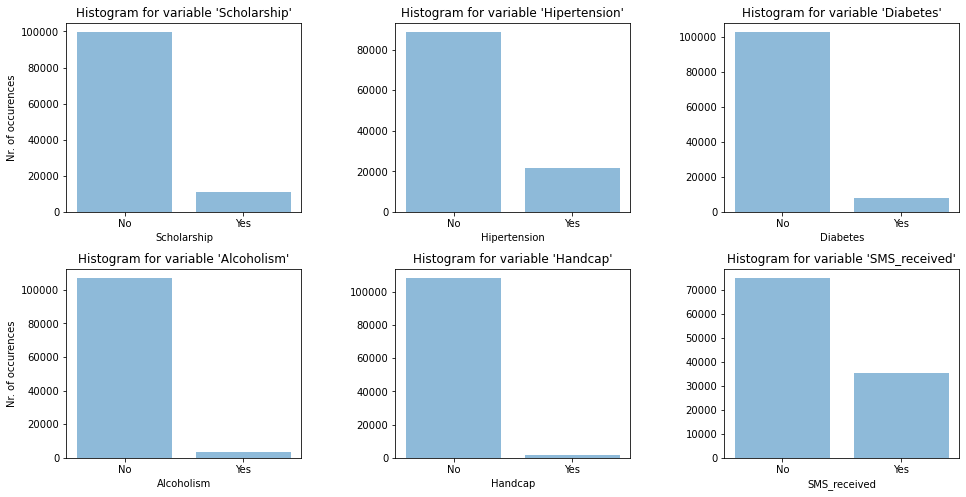

In [30]:
# Make histogramms for the six binary variables of interest
fig, axs = plt.subplots(2,3, figsize=(16, 8))

plt.subplots_adjust(wspace=0.4, hspace=0.3)
plot_hist_binary_pure('Scholarship',axs[0,0], ylabel=True)
plot_hist_binary_pure('Hipertension',axs[0,1])
plot_hist_binary_pure('Diabetes',axs[0,2])
plot_hist_binary_pure('Alcoholism',axs[1,0], ylabel=True)
plot_hist_binary_pure('Handcap',axs[1,1])
plot_hist_binary_pure('SMS_received',axs[1,2])

Plot the number of people within each of those categories who missed and attended appointments.

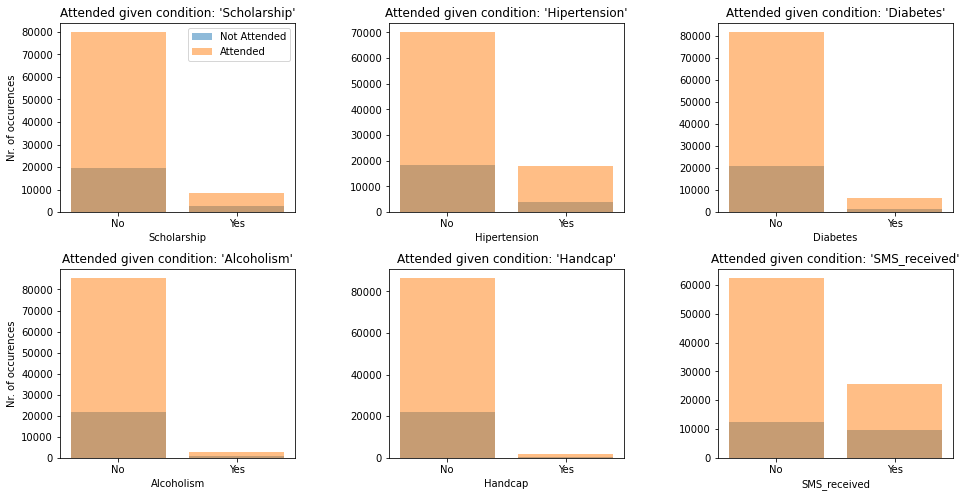

In [24]:
# Make plots for each binary variable showing the number of people who 
# did not and did attend an appointment
fig, axs = plt.subplots(2,3, figsize=(16, 8))

plt.subplots_adjust(wspace=0.4, hspace=0.3)
plot_hist_binary_separate('Scholarship',axs[0,0], ylabel=True)
axs[0,0].legend()
plot_hist_binary_separate('Hipertension',axs[0,1])
plot_hist_binary_separate('Diabetes',axs[0,2])
plot_hist_binary_separate('Alcoholism',axs[1,0], ylabel=True)
plot_hist_binary_separate('Handcap',axs[1,1])
plot_hist_binary_separate('SMS_received',axs[1,2])

Lastly, take a look of the percentages of people with a given condition who did attend an appointment.
Compare these values to the general population, which should serve here as a reference for making conclusions
about the deviatioins.

In [25]:
# Function for plotting percentage of people with a given condition (e.g. having alcoholism) 
# who attended an appointment
def plot_percentages(col,idx):
    mask = (df[col]==1) & (df['Attended']==1)
    plt.bar([idx],df[col][mask].count()/df[df[col]==1].shape[0])

0.2018964550044335


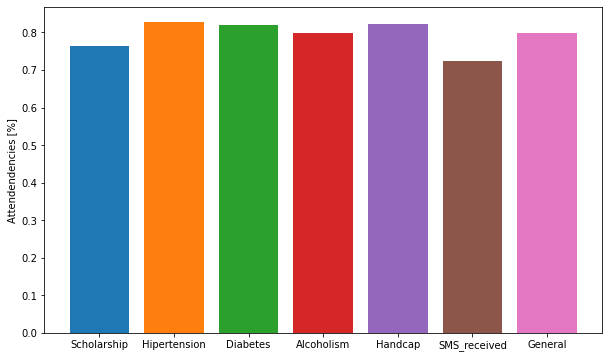

In [33]:
# Plot the above mentioned percentages for each binary variable in a single plot
# for a better comparison
plt.figure(figsize=(10,6))
plot_percentages('Scholarship',1)
plot_percentages('Hipertension',2)
plot_percentages('Diabetes',3)
plot_percentages('Alcoholism',4)
plot_percentages('Handcap',5)
plot_percentages('SMS_received',6)

# Additionally, compute the percentage of people of the general population who attended an appointment
plt.bar([7],df['Attended'][df['Attended']==1].count()/df.shape[0])
plt.ylabel('Attendendencies [%]')
plt.xticks([i for i in range(1,8)], list(cols_bin) + ['General']);

<h2> Conclusions of Subsection </h2>
From the above analysis, the following conclusions can be made:
<ul>
    <li> There are generally more people who attended the appointment than ones who missed an appointment,
        irrespective of the condition those people have. </li>
    <li> Some conditions appear much more often than others - e.g. alcoholism is about 20 times more rare than
        hypertension. For the analysis this implies that the results may difficult to generalize since the data
        points for some conditions may not be sufficient to make statistically relevant conclusions. However,
        trends can still be compared. </li>
    <li> The total number of people with a certain condition, who did not attend an appointment, seems to be
        generally much smaller than the amount of people without that condition who did not attend an
        appointment. This may seem obvious but there is one notable exception for people who received a SMS
        reminder. Even though, the number of people, who received a SMS, is much smaller than the ones,
        who did not receive one, the number of people who missed the appointment is almost identical between
        those two groups. </li>
    <li> The above point is also reflected in the percentages of people with a condition who did attend an
        appointment. While percentages of people with Hypertension, Diabetes, alcoholism and people with a
        handycap are very similar to each other and also closely resemble to the number of the general 
        population, people who received a SMS attended the appointments far less often. Also, the percentage
        of people with a scholarship who attended an appointment seems lower, even though the effect here seems
        smaller than for people who received a SMS. </li>
</ul>

All in all, the effect of the investigated conditions (binary variables) on missing an appointment is much smaller than anticipated. Looking at the relative values of people who missed attended an appointment, there are no big outliers but for all conditions the percentage is around 70 % - 80 %.

However, it seems rather counterintuitive that people who received a SMS reminder and people who hold a scholarship seem to miss appointments more often than the general population and the remaining conditions. It may be that these two variables are correlated to others in a non-trivial way, i.e. that only certain types of people receive a SMS reminder or hold a scholarship. However, this is beyond the scope of the current work and requires a thorough analysis on its own.

### Research Question 2: Effect of timespan between scheduling an appointment and the actual appointment on missing an appointment

Plot the fraction of appointments in each category (attended or missed) as function of the difference between scheduling day and appointment day. From that we should be able to see if there is any difference in the distributions of appointments., i.e. whether the one of those categories has more tightly packed appointments.

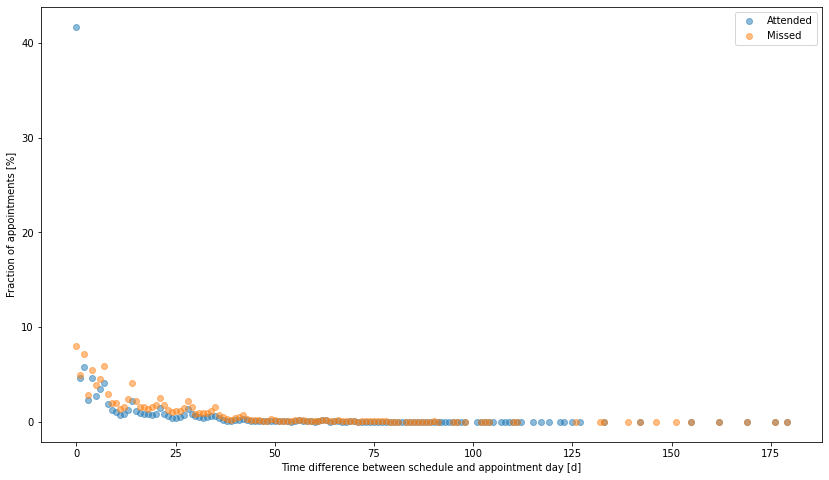

In [113]:
plt.figure(figsize=(14,8))

# Plot number of attended appointments as function time difference (normalized to the total appointments)
plt.scatter(df['TimeDiff'][df['Attended']==1].value_counts().sort_values().index.total_seconds()/(3600*24),
         df['TimeDiff'][df['Attended']==1].value_counts().sort_values()/df[df['Attended']==1].shape[0]*100, 
            alpha=0.5, label="Attended")

# Plot number of missed appointments as function time difference (normalized to the total appointments)
plt.scatter(df['TimeDiff'][df['Attended']==0].value_counts().sort_values().index.total_seconds()/(3600*24),
         df['TimeDiff'][df['Attended']==0].value_counts().sort_values()/df[df['Attended']==0].shape[0]*100,
            alpha=0.5, label="Missed")

plt.xlabel("Time difference between schedule and appointment day [d]")
plt.ylabel("Fraction of appointments [%]")
plt.legend()

Compute measures of central tendency for the time difference to verify what was seen visually in the plot above.

In [112]:
print("Statistics for time difference of people who attended an appointment")
print(f"Mean: {df['TimeDiff'][df['Attended']==1].mean()}")
print(f"Median: {df['TimeDiff'][df['Attended']==1].median()}")
print(f"Standard Deviation: {df['TimeDiff'][df['Attended']==1].std()}\n")

print("Statistics for time difference of people who missed an appointment")
print(f"Mean: {df['TimeDiff'][df['Attended']==0].mean()}")
print(f"Median: {df['TimeDiff'][df['Attended']==0].median()}")
print(f"Standard Deviation: {df['TimeDiff'][df['Attended']==0].std()}\n")

Statistics for time difference of people who attended an appointment
Mean: 8 days 18:06:42.575730
Median: 2 days 00:00:00
Standard Deviation: 14 days 13:12:34.372311

Statistics for time difference of people who missed an appointment
Mean: 15 days 20:03:05.856413
Median: 11 days 00:00:00
Standard Deviation: 16 days 14:32:03.799276



<h2> Conclusions of Subsection </h2>
From the above analysis, the following conclusions can be made:

<ul>
    <li> The graph above and the statistics show that for people who missed an appointment, the timespan
        between scheduling and the appointment was conssistenly larger than for people who attended
        an appointment. </li>
    <li> Maybe more importantly, for people who attended an appointment almost 45 % of all appointments were
        scheduled on the same day as the appointment was. A possible explanation for this is that these were
        urgent appointments which are unlikely to be missed. </li>
    <li> For missed appointments, on the other hand, there is more spread (also larger standard deviation)
        in the timespan and significantly far less appointments were scheduled on the same day.
</ul>

<a id='conclusions'></a>
## Conclusions

For more detailed conclusions see the conclusions of the individual subsections.

<ul>
    <li> The effect of the conditonal variables was far less than it would have been anticipated. However,
        figuring out that those binary variables/conditioins do not have a strong impact on missing an
        appointment can also be valuable. Even though, some counterintuitive trends could be observed
        (e.g. receiving a SMS actually increases the chance of missing an appointment), this conclusion might
        be flawed due to the fact that it is not clear whether those trends are actually statistically
        significant since no statistical tests have been performed. Additionally, some of those conditions
    might be entangled with each other or with some other hidden variables, which also would require
    a much more sophisticated analysis.</li>
    <li> The effect of the timespan between scheduling an appointment and the actual appointment yields a
        more clear conclusion. Especially, the fact that a major distinctioin between the missed appointments
        and the attended ones is that almost half of all attended appointments were scheduled on the same day.
        Apart from that, the timespan seems generally larger for the missed appointments than for
        the attended ones (the mean is almost doubles between these two) and the spread is increased. 
        However, also here it is not clear whether those observed differences are significant due to the 
        lack of statistical tests. </li>
</ul>

## References

N/A

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])